## Import the ANN model

In [1]:
# Import the model saved as h5 file
from keras.models import load_model

ANN_model = load_model(f'Yld2000_ANN.h5')
# The model takes strain data Eps_xx, Eps_yy, and Eps_xy from selected locations in HE test (at punch disp=16mm) as the inputs
# The output is parameters for Yld2000-2d, a1,a2,a3,...,a8

In [13]:
#Model summary: Layers and nodes
ANN_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 24)                360       
                                                                 
 dense_41 (Dense)            (None, 16)                400       
                                                                 
 dense_42 (Dense)            (None, 8)                 136       
                                                                 
 dense_43 (Dense)            (None, 8)                 72        
                                                                 
Total params: 968
Trainable params: 968
Non-trainable params: 0
_________________________________________________________________


In [14]:
# activation function for each layer
for layer in ANN_model.layers:
    if hasattr(layer, 'activation'):
        print(f"Layer: {layer.name}, Activation Function: {layer.activation.__name__}")


Layer: dense_40, Activation Function: sigmoid
Layer: dense_41, Activation Function: sigmoid
Layer: dense_42, Activation Function: sigmoid
Layer: dense_43, Activation Function: linear


## Import the data to test

In [2]:
import pandas as pd
test_data=pd.read_csv("test_dataset.txt", sep="\t")
test_data

Unnamed: 0  0E1LE11  0E1LE22  45E1LE11  45E1LE22  90E1LE11  90E1LE22  \
0             0  -0.0860   0.2559    0.0704    0.0628    0.2351   -0.0344   
1             1  -0.0534   0.2279    0.0653    0.0701    0.2623   -0.1299   
2             2  -0.0657   0.1966    0.1007    0.0989    0.2167   -0.1009   
3             3  -0.1532   0.2650    0.1052    0.0532    0.2072   -0.0349   
4             4  -0.0545   0.2214    0.1369    0.0581    0.1904   -0.0493   
..          ...      ...      ...       ...       ...       ...       ...   
415         415  -0.0593   0.2219    0.0719    0.0478    0.2115   -0.0494   
416         416  -0.0508   0.2493    0.1476    0.0630    0.1826   -0.0251   
417         417  -0.2301   0.2874    0.0800    0.0433    0.2368   -0.0739   
418         418  -0.2252   0.2327    0.0990    0.0558    0.2167   -0.2023   
419         419  -0.1189   0.2242    0.0763    0.1045    0.2544   -0.2238   

     0E2LE11  0E2LE22  45E2LE11  ...  0E3LE11  0E3LE22    a1    a2    a3  \
0    -0.0016   0.1436    0.0795  ...   0.0379   0.1153  0.82  1.00  1.03   
1    -0.0055   0.1496    0.0692  ...   0.0337   0.1234  1.00  0.90  0.99   
2    -0.0153   0.1680    0.0639  ...   0.0269   0.1463  1.13  1.08  0.99   
3     0.0110   0.1411    0.0839  ...   0.0453   0.1111  0.94  0.94  1.15   
4    -0.0002   0.1626    0.0712  ...   0.0384   0.1360  1.10  0.90  1.08   
..       ...      ...       ...  ...      ...      ...   ...   ...   ...   
415  -0.0224   0.1657    0.0723  ...   0.0250   0.1386  0.99  0.90  0.81   
416   0.0004   0.1611    0.0810  ...   0.0401   0.1268  0.97  0.80  0.99   
417  -0.0059   0.1421    0.0840  ...   0.0370   0.1083  1.11  1.01  1.12   
418  -0.0921   0.1906    0.0731  ...   0.0443   0.1256  1.16  1.17  1.17   
419   0.0013   0.1425    0.0625  ...   0.0334   0.1149  1.09  1.15  1.19   

       a4    a5    a6    a7    a8  
0    0.99  1.04  1.09  1.01  1.07  
1    1.05  0.95  0.91  0.99  1.05  
2    1.16  1.09  0.87  0.95  0.93  
3    0.95  1.12  1.03  0.97  1.04  
4    1.08  1.18  0.86  0.97  0.95  
..    ...   ...   ...   ...   ...  
415  1.05  1.10  0.90  1.03  1.01  
416  0.98  1.20  1.03  0.88  1.00  
417  0.97  1.15  1.17  1.11  1.19  
418  0.82  0.85  0.86  0.90  1.00  
419  1.12  0.89  0.80  0.94  1.19  

[420 rows x 23 columns]

In the dataset

The column  disp=> Punch displacement level (=16mm)

"0E1LE11","0E1LE22","45E1LE11","45E1LE22",
"90E1LE11","90E1LE22","0E2LE11","0E2LE22","45E2LE11",
"45E2LE22","90E2LE11","90E2LE22","0E3LE11","0E3LE22"=> strain components
           
0E1LE11- stands for true strain in 11 direction at 0degrees at first radial location
45E2LE22- stands for true strain in 22 direction at 45degrees at 2nd radial location and so on

a1, a2, a3..., a8 are the parameters of Yld2000-2d yield function

In [3]:
# split the data to inputs and targets
inputs=test_data[["0E1LE11","0E1LE22","45E1LE11","45E1LE22","90E1LE11","90E1LE22","0E2LE11","0E2LE22","45E2LE11","45E2LE22","90E2LE11","90E2LE22","0E3LE11","0E3LE22"]]
targets=test_data[["a1","a2","a3","a4","a5","a6","a7","a8"]]


In [4]:
# Define the max and min values as dictionaries (from training data)

max_values = {
    "0E1LE11": -0.0078, "0E1LE22": 0.7921, "45E1LE11": 0.8227, "45E1LE22": 0.8066,
    "90E1LE11": 0.7472, "90E1LE22": -0.0026, "0E2LE11": 0.0314, "0E2LE22": 0.6190,
    "45E2LE11": 0.4684, "45E2LE22": 0.4553, "90E2LE11": 0.4288, "90E2LE22": 0.0218,
    "0E3LE11": 0.0731, "0E3LE22": 0.3515
}

min_values = {
    "0E1LE11": -0.4347, "0E1LE22": 0.1534, "45E1LE11": 0.0044, "45E1LE22": -0.0056,
    "90E1LE11": 0.1519, "90E1LE22": -0.4056, "0E2LE11": -0.1391, "0E2LE22": 0.0923,
    "45E2LE11": 0.0421, "45E2LE22": 0.0349, "90E2LE11": 0.0888, "90E2LE22": -0.1337,
    "0E3LE11": 0.0051, "0E3LE22": 0.0740
}

# Create a DataFrame
normalization_df = pd.DataFrame({"Min": min_values, "Max": max_values})

# Display the DataFrame
print(normalization_df)


             Min     Max
0E1LE11  -0.4347 -0.0078
0E1LE22   0.1534  0.7921
45E1LE11  0.0044  0.8227
45E1LE22 -0.0056  0.8066
90E1LE11  0.1519  0.7472
90E1LE22 -0.4056 -0.0026
0E2LE11  -0.1391  0.0314
0E2LE22   0.0923  0.6190
45E2LE11  0.0421  0.4684
45E2LE22  0.0349  0.4553
90E2LE11  0.0888  0.4288
90E2LE22 -0.1337  0.0218
0E3LE11   0.0051  0.0731
0E3LE22   0.0740  0.3515


In [5]:
normalized_inputs = (inputs- normalization_df["Min"]) / (normalization_df["Max"] - normalization_df["Min"])
normalized_inputs

0E1LE11   0E1LE22  45E1LE11  45E1LE22  90E1LE11  90E1LE22   0E2LE11  \
0    0.816819  0.160482  0.080655  0.084216  0.139761  0.921092  0.806452   
1    0.893183  0.116643  0.074423  0.093204  0.185453  0.684119  0.783578   
2    0.864371  0.067637  0.117683  0.128663  0.108853  0.756079  0.726100   
3    0.659405  0.174730  0.123182  0.072396  0.092894  0.919851  0.880352   
4    0.890607  0.106466  0.161921  0.078429  0.064673  0.884119  0.814663   
..        ...       ...       ...       ...       ...       ...       ...   
415  0.879363  0.107249  0.082488  0.065747  0.100118  0.883871  0.684457   
416  0.899274  0.150149  0.174997  0.084462  0.051571  0.944169  0.818182   
417  0.479269  0.209801  0.092387  0.060207  0.142617  0.823077  0.781232   
418  0.490747  0.124158  0.115606  0.075597  0.108853  0.504467  0.275660   
419  0.739752  0.110850  0.087865  0.135558  0.172182  0.451117  0.823460   

      0E2LE22  45E2LE11  45E2LE22  90E2LE11  90E2LE22   0E3LE11   0E3LE22  
0    0.097399  0.087732  0.083968  0.150294  0.888103  0.482353  0.148829  
1    0.108791  0.063570  0.093958  0.191765  0.778135  0.420588  0.178018  
2    0.143725  0.051138  0.072550  0.267647  0.695177  0.320588  0.260541  
3    0.092652  0.098053  0.069696  0.168824  0.818006  0.591176  0.133694  
4    0.133473  0.068262  0.068982  0.243529  0.686174  0.489706  0.223423  
..        ...       ...       ...       ...       ...       ...       ...  
415  0.139358  0.070842  0.068744  0.212941  0.747910  0.292647  0.232793  
416  0.130625  0.091250  0.063511  0.192647  0.782637  0.514706  0.190270  
417  0.094551  0.098288  0.066365  0.148529  0.852733  0.469118  0.123604  
418  0.186634  0.072719  0.056375  0.238235  0.454662  0.576471  0.185946  
419  0.095310  0.047854  0.106089  0.231471  0.533119  0.416176  0.147387  

[420 rows x 14 columns]

In [10]:
#Convert the input and target to numpy array
x=normalized_inputs.to_numpy()

#Feed the inputs to the ANN and get the predictions
predictions=ANN_model.predict(x)

#Convert it into dataframe
predictions_df = pd.DataFrame(predictions)
column_names = ["a1","a2","a3","a4","a5","a6","a7","a8"]
predictions_df.columns = column_names
predictions_df


14/14 [==============================] - 0s 805us/step


a1        a2        a3        a4        a5        a6        a7  \
0    0.922228  0.957210  1.068003  0.972236  1.060935  1.069602  0.997365   
1    1.015768  0.964271  1.026121  1.089132  0.974461  0.963990  0.992011   
2    1.080796  0.986585  0.935542  1.146824  1.077953  0.888176  0.896481   
3    0.991720  0.926862  1.134453  0.921855  1.105366  0.986369  0.934209   
4    1.064822  0.894607  1.076341  1.099282  1.161451  0.853094  0.909639   
..        ...       ...       ...       ...       ...       ...       ...   
415  1.009742  0.997674  0.914151  1.088946  1.129667  0.933401  1.009401   
416  0.991677  0.924445  1.078704  1.034791  1.169413  0.969980  0.886329   
417  0.986574  0.994986  1.056300  0.859777  1.058256  1.017860  0.999185   
418  1.146073  0.979925  1.161823  0.850058  0.908883  0.893734  0.903583   
419  1.123677  1.029224  1.069410  1.032433  0.844204  0.935689  0.873691   

           a8  
0    0.962891  
1    0.981436  
2    0.959333  
3    0.990560  
4    0.949535  
..        ...  
415  0.929610  
416  0.953033  
417  1.003085  
418  1.103387  
419  1.096083  

[420 rows x 8 columns]

## Plot the results

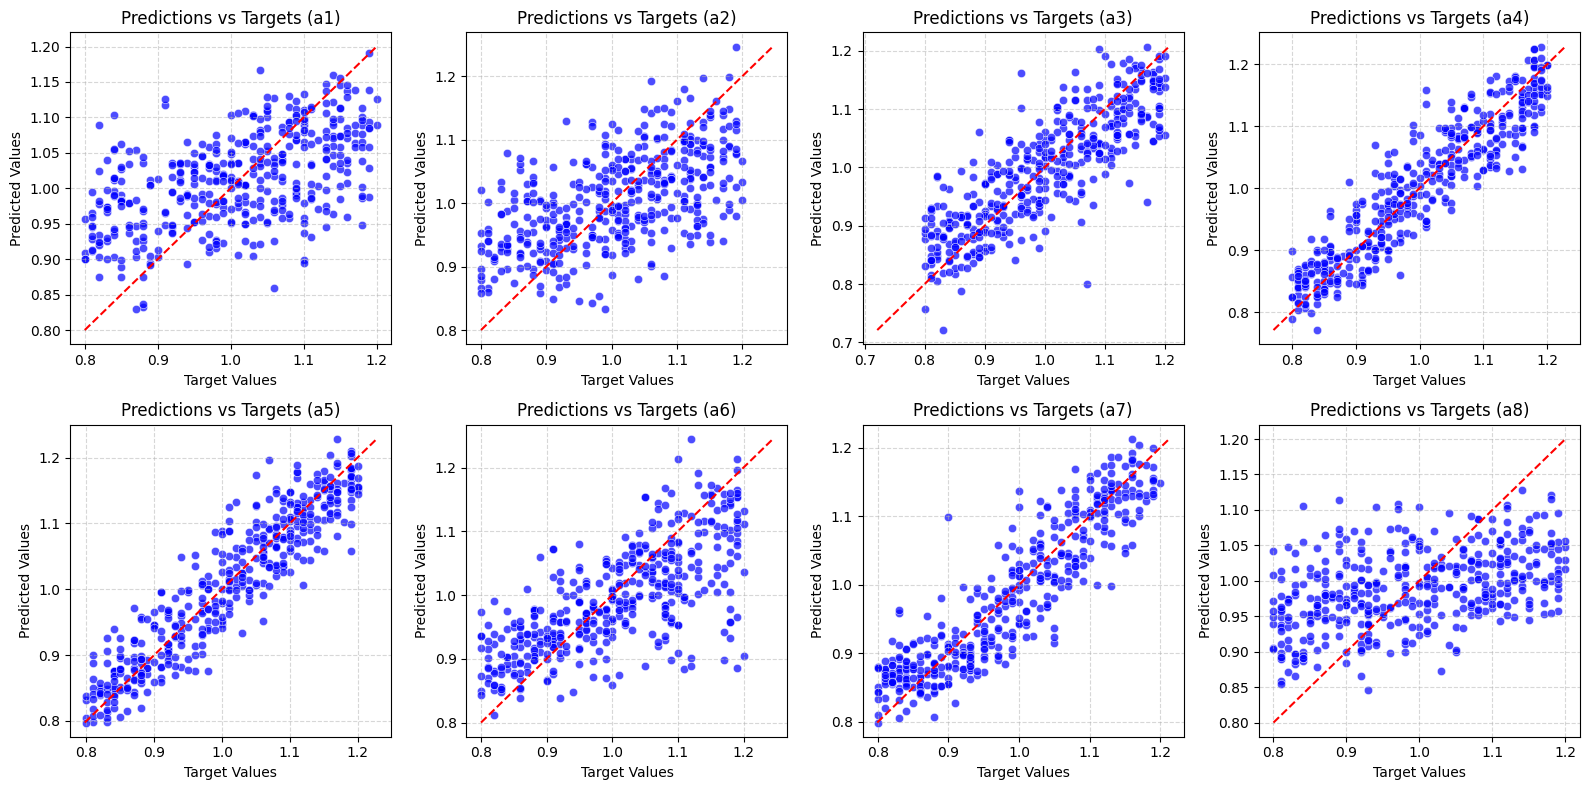

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure predictions_df and targets_df have the same column names
columns = ["a1", "a2", "a3", "a4", "a5", "a6", "a7", "a8"]

# Set figure size for multiple plots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows, 4 columns

# Loop through each column and create a scatter plot
for i, col in enumerate(columns):
    row, col_pos = divmod(i, 4)  # Determines subplot position (row, column)
    
    sns.scatterplot(x=targets[col], y=predictions_df[col], ax=axes[row, col_pos], color="blue", alpha=0.7)

    # Plot y = x reference line
    min_val = min(targets[col].min(), predictions_df[col].min())
    max_val = max(targets[col].max(), predictions_df[col].max())
    axes[row, col_pos].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

    # Titles and labels
    axes[row, col_pos].set_title(f"Predictions vs Targets ({col})", fontsize=12)
    axes[row, col_pos].set_xlabel("Target Values")
    axes[row, col_pos].set_ylabel("Predicted Values")
    axes[row, col_pos].grid(True, linestyle="--", alpha=0.5)

# Adjust layout for readability
plt.tight_layout()
plt.show()
